
**Desafio**

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.


**Configurações**

In [178]:
import numpy as np
np.random.seed(42)
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

**Importação da base de dados**

A base utilizada (insurance.csv) foi encontrada no Kaggle. Link da base utilizada:
[Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mragpavank/insurance1)

Realizando a importação da base de dados "insurance.csv" utilizando a biblioteca pandas e analisar a dimensão dos dados.

In [179]:
import pandas as pd

insurance_df = pd.read_csv('insurance.csv')

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [180]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Análise exploratória**


In [181]:
insurance_df.shape

(1338, 7)

In [182]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [183]:
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Analisando os dados podemos observar que nossa base possui 1338 linhas, 6 features, nenhuma possui valores nulos e 3 delas (sex, smoker e region) são do tipo texto.


**Features**

*   Idade
*   Gênero
*   IMC
*   Quantidade de Filhos
*   Fumante
*   Região


**Target**

A variável Target é a classe **charges** (encargos/cobranças).


Vamos então analisar quantas categorias existem em cada uma delas utilizando a função ***value_counts***

In [184]:
insurance_df.smoker.value_counts()


,count
smoker,
no,1064
yes,274


<Axes: title={'center': 'Smoker'}, ylabel='count'>

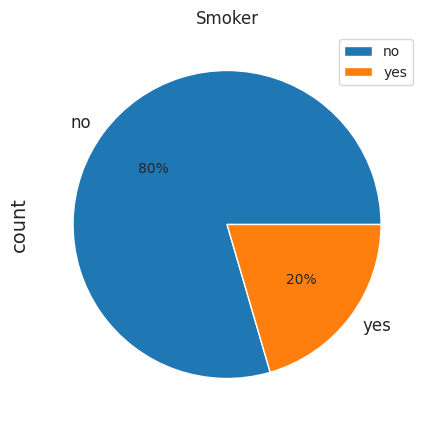

In [247]:
insurance_df.smoker.value_counts().plot(kind='pie', figsize=(5,5), title='Smoker', legend=True, autopct = "%.0f%%",)

In [185]:
insurance_df.sex.value_counts()

,count
sex,
male,676
female,662


<Axes: title={'center': 'Sex'}, ylabel='count'>

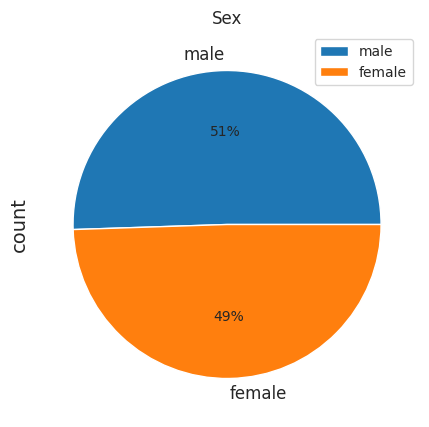

In [248]:
insurance_df.sex.value_counts().plot(kind='pie', figsize=(5,5), title='Sex', legend=True, autopct = "%.0f%%",)

In [186]:
insurance_df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Axes: title={'center': 'Region'}, ylabel='count'>

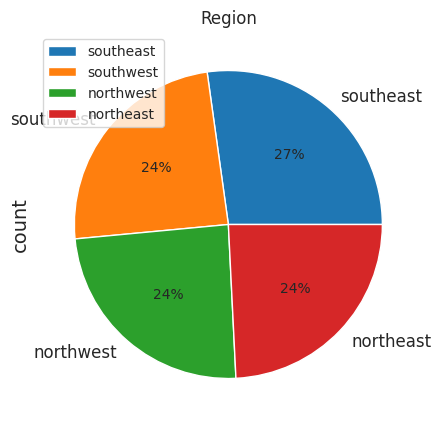

In [246]:
insurance_df.region.value_counts().plot(kind='pie', figsize=(5,5), title='Region', legend=True, autopct = "%.0f%%")

Pode se observar que os pacientes da amostra estão distribuidos uniformemente entre as 4 regiões, que a maioria são não fumantes e tem praticamente a mesma quantidade de homens e mulheres.

Agora vamos analisar os dados do tipo numérico com a função describe():

In [249]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Analisando algumas distribuições com histogramas:

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

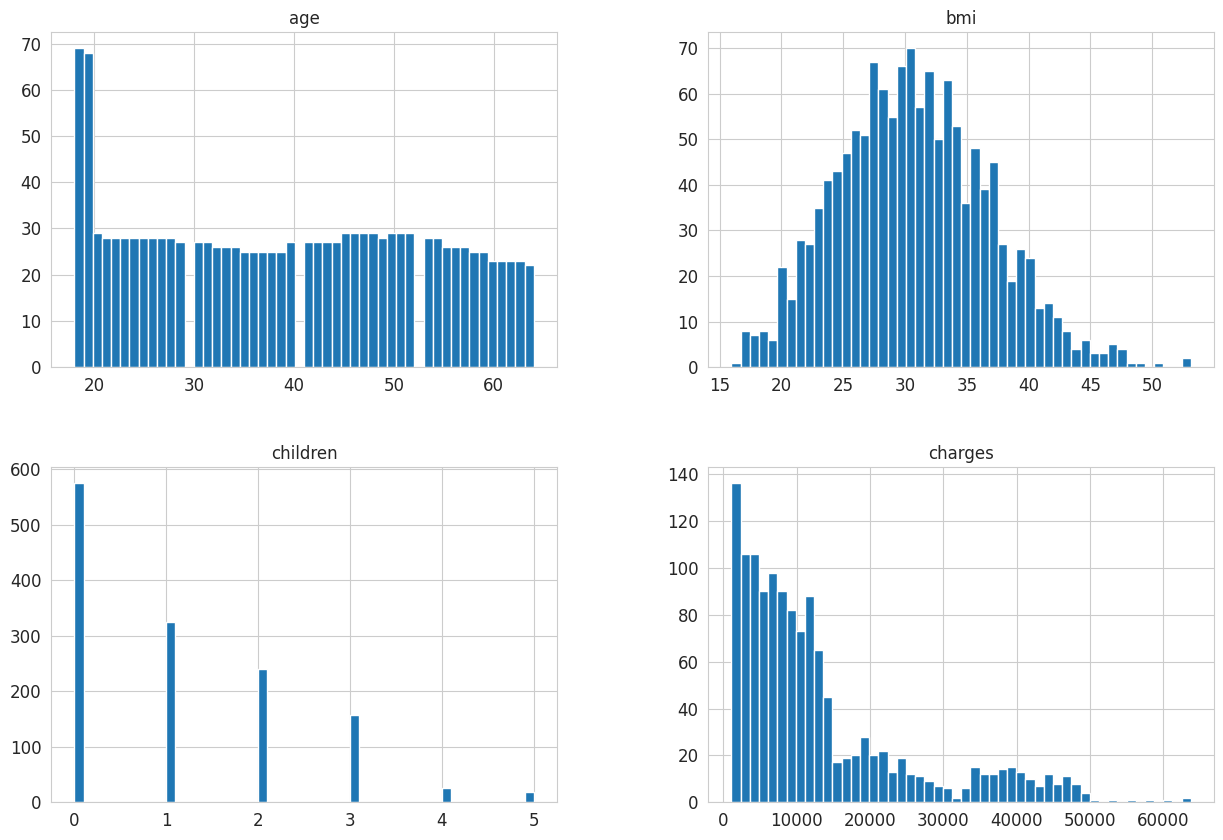

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style("whitegrid")
insurance_df.hist(bins=50, figsize=(15,10))

<Axes: ylabel='age'>

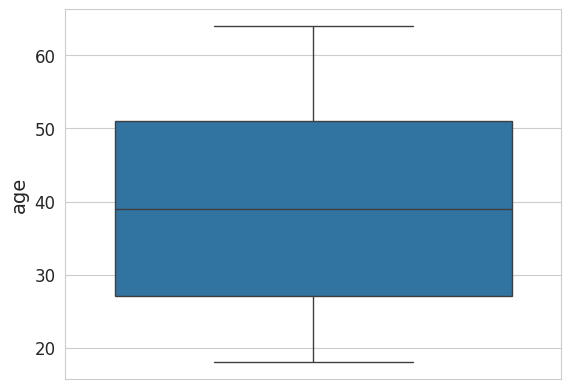

In [189]:
sb.boxplot(y=insurance_df["age"])

<Axes: ylabel='charges'>

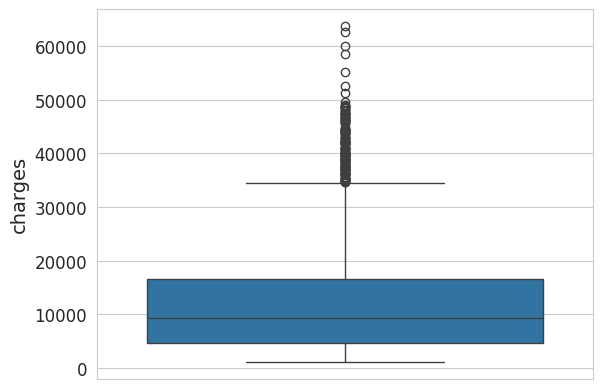

In [190]:
sb.boxplot(y=insurance_df["charges"])

<Axes: ylabel='children'>

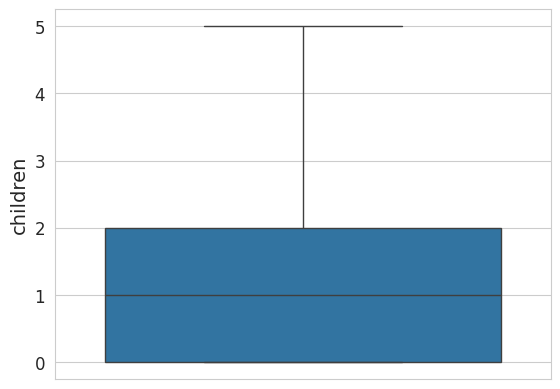

In [191]:
sb.boxplot(y=insurance_df["children"])

Aplicando técnicas de transformação nos dados:

*   Label Enconder para tratar variáveis categóricas que possuem apenas dois tipos de dados como sexo e se é fumante;
*   One Hot Encoding para a região.


**Label Enconder**

Aplicando Label Encoder nas colunas **gênero** e **fumante**

In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
insurance_lbl_encoded = insurance_df.copy()

colunas=['sex','smoker']

label_encoder = LabelEncoder()

for col in colunas:
    insurance_lbl_encoded[col] = label_encoder.fit_transform(insurance_lbl_encoded[col])

insurance_lbl_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


**One Hot Encoding**

Aplicando One Hot Encoding na coluna **região**

Pré-processando as categorias
Agora vamos pré-processar o recurso de entrada categórica ***region***:

In [194]:
df_cat = insurance_lbl_encoded[['region']]
df_cat.head(5)

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest


In [195]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_cat)

categorical_columns = [f'{col}_{cat}' for i, col in enumerate(df_cat.columns) for cat in encoder.categories_[i]]
categorical_columns

one_hot_df = pd.DataFrame(one_hot_encoded, columns=categorical_columns)

df_encoded = pd.concat([insurance_lbl_encoded, one_hot_df], axis=1)

df_encoded = df_encoded.drop(df_cat, axis=1)

df_encoded


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


**Matriz de Correlação**


In [196]:
print(df_encoded.corr()['charges'])

age                 0.299008
sex                 0.057292
bmi                 0.198341
children            0.067998
smoker              0.787251
charges             1.000000
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64


<Axes: >

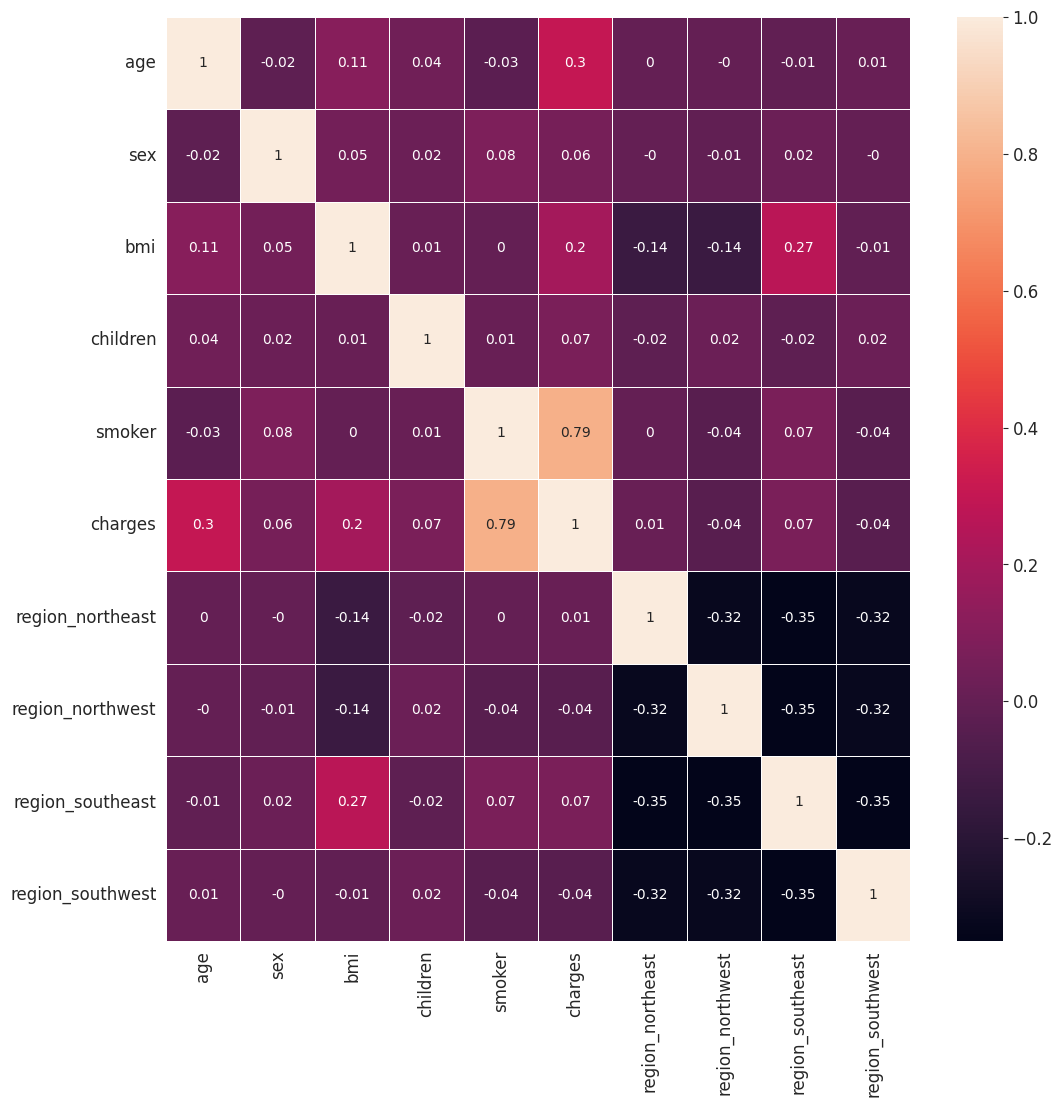

In [197]:

correlation_matrix = df_encoded.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='smoker', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='bmi', ylabel='sex'>,
        <Axes: xlabel='children', ylabel='sex'>,
        <Axes: xlabel='smoker', ylabel='sex'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='sex', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='smoker', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='sex', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='smoker', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='smoker'>,
        <Axe

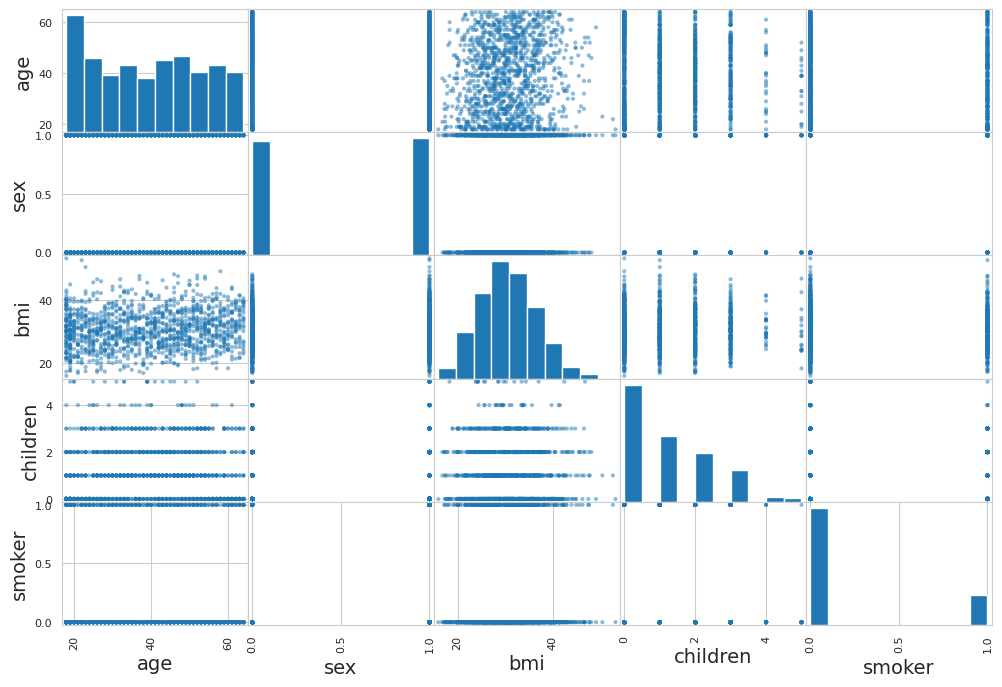

In [198]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["age", "sex", "bmi", "children", "smoker"]
scatter_matrix(df_encoded[attributes], figsize=(12, 8))

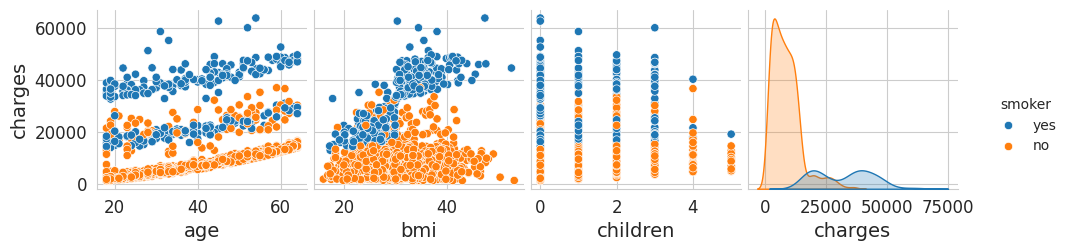

In [256]:
sb.pairplot(insurance_df, hue='smoker', y_vars=['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

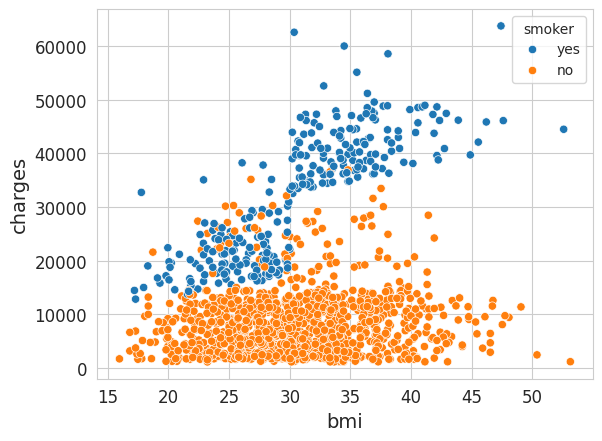

In [259]:
sb.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker')

### Separando os dados

In [201]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [203]:
lin_reg.score(X_test, y_test)

0.7835929767120723

Testando com a padronização

In [204]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)

In [205]:
lin_reg_standard = LinearRegression()
lin_reg_standard.fit(x_train_standard_scaled, y_train)

lin_reg_standard.score(x_test_standard_scaled, y_test)

0.7810553881326064

In [206]:
# vamos tentar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = X.iloc[:5]
some_labels = y.iloc[:5]

#some_data_prepared = full_pipeline.transform(some_data)

predictions = lin_reg.predict(X)

print("Predictions:", lin_reg.predict(some_data))

Predictions: [25197.53106142  3826.78192926  6987.53528962  3813.39661623
  5637.96741868]


In [207]:
print("Labels:", list(some_labels))

Labels: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


# Avaliando o modelo ✅

O **MSE** mede a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados no conjunto de dados.

Quanto menor o valor do MSE, melhor o ajuste do modelo aos dados.

In [208]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Função para calcular o MAPE (Mean Absolute Percentage Error)
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [209]:
insurance_predictions = lin_reg.predict(X)

# Calcular MAE, MSE e RMSE
mae = mean_absolute_error(y, insurance_predictions)
mse = mean_squared_error(y, insurance_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, insurance_predictions)

# Calcular o MAPE
mape_result = calculate_mape(y, insurance_predictions)

# Imprimir as métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'r²: {r2}')
print(f"O MAPE é: {mape_result:.2f}%")

MAE: 4202.8184690079615
MSE: 36540428.15345654
RMSE: 6044.867918611336
r²: 0.7506500728231758
O MAPE é: 43.14%


In [234]:
import statsmodels.api as sm
import pandas as pd

# Criar e ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:16:02   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899  

## **Outro Modelo: Decision Tree Regression**

In [215]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=5)
model_dtr.fit(X_train, y_train)

model_dtr.score(X_test, y_test)

0.8334428126395235

Testando com a padronização

In [216]:
model_dtr_standard = DecisionTreeRegressor(max_depth=5)
model_dtr_standard.fit(x_train_standard_scaled, y_train)

model_dtr_standard.score(x_test_standard_scaled, y_test)

0.8334428126395235

In [217]:
some_data = X.iloc[:5]
some_labels = y.iloc[:5]

predictions = model_dtr.predict(X)

print("Predictions:", model_dtr.predict(some_data))

Predictions: [17100.82032778  3289.31209167  6458.47336511  5243.04129723
  5243.04129723]


In [218]:
print("Labels:", list(some_labels))

Labels: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


In [219]:
insurance_predictions = model_dtr.predict(X)

# Calcular MAE, MSE e RMSE
mae = mean_absolute_error(y, insurance_predictions)
mse = mean_squared_error(y, insurance_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, insurance_predictions)

# Calcular o MAPE
mape_result = calculate_mape(y, insurance_predictions)

# Imprimir as métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'r²: {r2}')
print(f"O MAPE é: {mape_result:.2f}%")

MAE: 2441.371174183934
MSE: 18903690.645934545
RMSE: 4347.837467745839
r²: 0.8710022261878968
O MAPE é: 29.28%


## **Outro Modelo: Random Forest Regression**

In [224]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.8638818215825357

In [225]:
insurance_predictions = rf_model.predict(X)

# Calcular MAE, MSE e RMSE
mae = mean_absolute_error(y, insurance_predictions)
mse = mean_squared_error(y, insurance_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, insurance_predictions)

# Calcular o MAPE
mape_result = calculate_mape(y, insurance_predictions)

# Imprimir as métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'r²: {r2}')
print(f"O MAPE é: {mape_result:.2f}%")

MAE: 1321.1373116411814
MSE: 7013353.4383973945
RMSE: 2648.2736713560016
r²: 0.9521412512796653
O MAPE é: 15.42%


Testando com a padronização

In [231]:
rf_model_standard = RandomForestRegressor(max_depth=5)
rf_model_standard.fit(x_train_standard_scaled, y_train)

rf_model_standard.score(x_test_standard_scaled, y_test)

0.8749943121350485

In [232]:
insurance_predictions = rf_model_standard.predict(X.values)

# Calcular MAE, MSE e RMSE
mae = mean_absolute_error(y, insurance_predictions)
mse = mean_squared_error(y, insurance_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, insurance_predictions)

# Calcular o MAPE
mape_result = calculate_mape(y, insurance_predictions)

# Imprimir as métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'r²: {r2}')
print(f"O MAPE é: {mape_result:.2f}%")

MAE: 12718.013721480755
MSE: 209927410.89734685
RMSE: 14488.871967732575
r²: -0.43253342297580866
O MAPE é: 239.78%


Analisando resultados


In [262]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_predito = rf_model_standard.predict(X_test)

matriz_confusao = confusion_matrix(y_test, y_predito)
plt.figure(figsize = (8, 4))
sns.heatmap(matriz_confusao, annot = True, fmt="d",cmap = "Blues")
plt.xlabel("Predição");
plt.ylabel("Dados Reais");

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: continuous is not supported